In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [36]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.shape

(200, 5)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [40]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [41]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

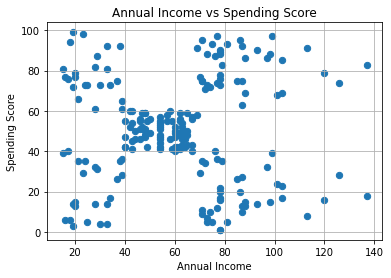

In [42]:
plt.scatter(X[:,0], X[:,1], s=40)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending Score')
plt.grid(True)
plt.show()

In [43]:
wcss = []
krange = range(1, 11)
for k in krange:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\admi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\admi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

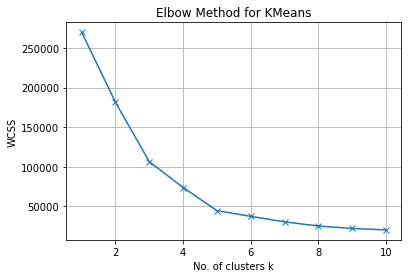

In [44]:
plt.plot(list(krange), wcss, marker='x')
plt.xlabel('No. of clusters k')
plt.ylabel('WCSS')
plt.title('Elbow Method for KMeans')
plt.grid(True)
plt.show()

In [45]:
k = 5
kmeans_scaled = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_km_scaled = kmeans_scaled.fit_predict(X)
centroids_scaled = kmeans_scaled.cluster_centers_

c:\Users\admi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


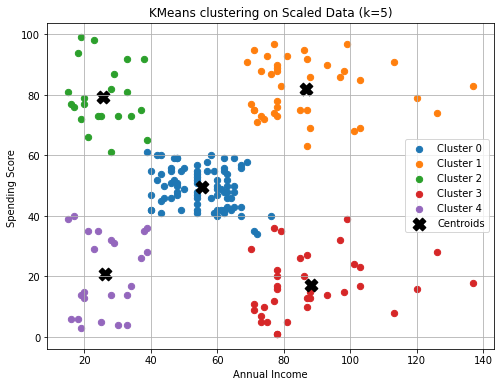

In [46]:
plt.figure(figsize=(8,6))
for i in range(k):
    plt.scatter(X[labels_km_scaled==i, 0], X[labels_km_scaled==i, 1], s=40, label=f'Cluster {i}')


plt.scatter(centroids_scaled[:,0], centroids_scaled[:,1], s=150, marker='X', c='black', edgecolor='k', linewidth=1.5, label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score ')
plt.title(f'KMeans clustering on Scaled Data (k={k})')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
print('KMeans silhouette score:'.format(k), silhouette_score(X, labels_km_scaled))

KMeans silhouette score: 0.553931997444648


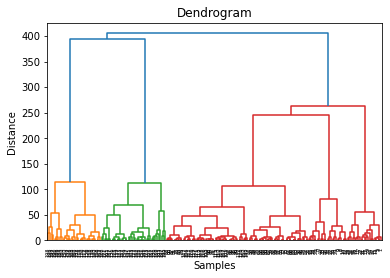

In [48]:
linked = linkage(X, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [49]:
k_hier = 5
agg_scaled = AgglomerativeClustering(n_clusters=k_hier, linkage='ward')
labels_hier_scaled = agg_scaled.fit_predict(X)

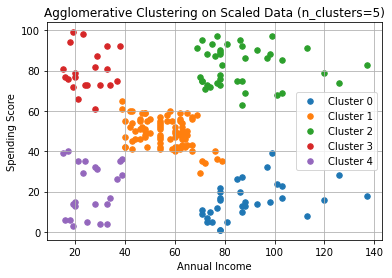

Agglomerative silhouette score (scaled): 0.5529945955148897


In [50]:
for i in range(k_hier):
    plt.scatter(X[labels_hier_scaled==i,0], X[labels_hier_scaled==i,1], s=30, label=f'Cluster {i}')
    
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title(f'Agglomerative Clustering on Scaled Data (n_clusters={k_hier})')
plt.legend()
plt.grid(True)
plt.show()


print('Agglomerative silhouette score (scaled):', silhouette_score(X, labels_hier_scaled))

DBSCAN

In [51]:
min_samples = 5
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances,indices = nbrs.kneighbors(X)
k_distances = np.sort(distances[:, min_samples-1])

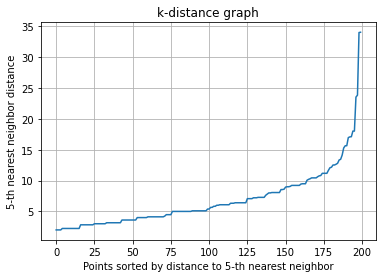

In [52]:
plt.plot(k_distances)
plt.xlabel('Points sorted by distance to {}-th nearest neighbor'.format(min_samples))
plt.ylabel('{}-th nearest neighbor distance'.format(min_samples))
plt.title('k-distance graph')
plt.grid(True)
plt.show()

In [53]:
db = DBSCAN(eps=10, min_samples=7)
labels_db = db.fit_predict(X)

In [54]:
clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
noise = list(labels_db).count(-1)
print('DBSCAN found clusters:', clusters_db, 'and noise points:', noise)

DBSCAN found clusters: 5 and noise points: 23


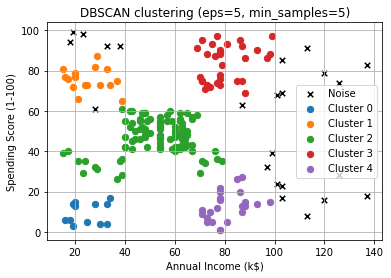

DBSCAN silhouette score: 0.42084049577844984


In [ ]:
unique_labels = sorted(set(labels_db))
for lbl in unique_labels:
    if lbl == -1:
        plt.scatter(X[labels_db==lbl, 0], X[labels_db==lbl, 1], s=30, c='k', marker='x', label='Noise')
    else:
        plt.scatter(X[labels_db==lbl, 0], X[labels_db==lbl, 1], s=40, label=f'Cluster {lbl}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN clustering (eps=5, min_samples=5)')
plt.legend()
plt.grid(True)
plt.show()

try:
    if clusters_db >= 2:
        print('DBSCAN silhouette score:', silhouette_score(X, labels_db))
    else:
        print('DBSCAN silhouette score: not applicable')
except Exception as e:
    print('Could not compute DBSCAN silhouette score:', e)